In [1]:
from src.helper import get_split_data

In [2]:
X_trn, y_trn, X_val, y_val, X_tst, y_tst = get_split_data.split_data_for_training()

In [3]:
from sklearn import tree

hi_variance = tree.DecisionTreeClassifier(max_depth=None)
hi_variance.fit(X_trn, y_trn)
hi_variance.score(X_tst, y_tst)

0.6

[Text(0.5215515012257268, 0.9821428571428571, 'points_difference <= 1.5\ngini = 0.496\nsamples = 2954\nvalue = [1608.0, 1346.0]'),
 Text(0.21010243134674503, 0.9464285714285714, 'points_difference <= -14.5\ngini = 0.455\nsamples = 1739\nvalue = [1131, 608]'),
 Text(0.3658269662862359, 0.9642857142857142, 'True  '),
 Text(0.10181981091268615, 0.9107142857142857, 'team_acceleration_home <= 86.277\ngini = 0.356\nsamples = 350\nvalue = [269, 81]'),
 Text(0.09984242723846011, 0.875, 'away_last_team_possession <= 66.0\ngini = 0.349\nsamples = 347\nvalue = [269, 78]'),
 Text(0.08301921769758389, 0.8392857142857143, 'rolling_avg_goals_away <= 2.142\ngini = 0.334\nsamples = 335\nvalue = [264, 71]'),
 Text(0.05876537106840512, 0.8035714285714286, 'home_last_team_possession <= 56.5\ngini = 0.383\nsamples = 217\nvalue = [161, 56]'),
 Text(0.030525860470864488, 0.7678571428571429, 'rolling_avg_goals_away <= 1.558\ngini = 0.429\nsamples = 167\nvalue = [115, 52]'),
 Text(0.009886918371130198, 0.73214

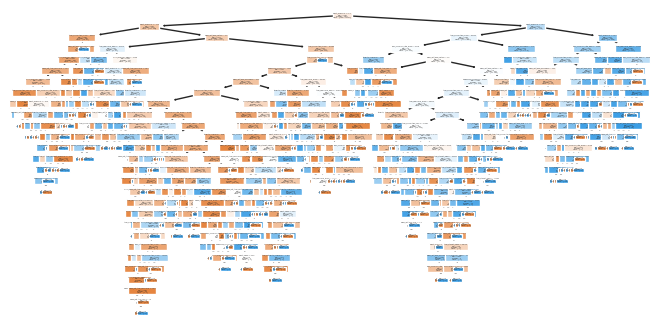

In [4]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
features = list(c for c in X_trn.columns)
tree.plot_tree(hi_variance, feature_names=features, filled=True)

[Text(0.5, 0.875, 'points_difference <= 1.5\ngini = 0.496\nsamples = 2954\nvalue = [1608.0, 1346.0]\nclass = home_not_win'),
 Text(0.25, 0.625, 'points_difference <= -14.5\ngini = 0.455\nsamples = 1739\nvalue = [1131, 608]\nclass = home_not_win'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'team_acceleration_home <= 86.277\ngini = 0.356\nsamples = 350\nvalue = [269, 81]\nclass = home_not_win'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'away_last_team_shoton <= 2.5\ngini = 0.471\nsamples = 1389\nvalue = [862.0, 527.0]\nclass = home_not_win'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'points_difference <= 10.5\ngini = 0.477\nsamples = 1215\nvalue = [477, 738]\nclass = home_win'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'team_acceleration_home <= 82.139\ngini = 0.498\nsamples = 717\nvalue = [337.0, 380.0]\nclass = home_win'),
 Text(0.5625, 0.125, '\n  (...)  \

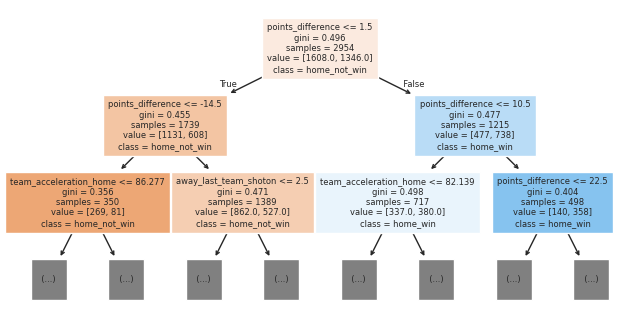

In [5]:
class_names_str = ['home_win' if cls == 1 else 'home_not_win' for cls in hi_variance.classes_]

fig, ax = plt.subplots(figsize=(8, 4))
features = list(c for c in X_trn.columns)
tree.plot_tree(hi_variance, feature_names=features, filled=True,
               class_names=class_names_str,
               max_depth=2, fontsize=6)

Text(0.5, 0, 'max_depth')

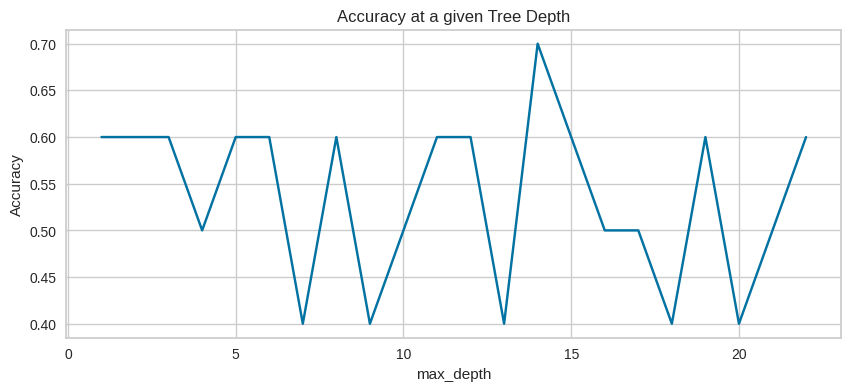

In [9]:
import pandas as pd

accuracies = []
for depth in range(1, 23):
    between = tree.DecisionTreeClassifier(max_depth=depth)
    between.fit(X_trn, y_trn)
    accuracies.append(between.score(X_val, y_val))
fig, ax = plt.subplots(figsize=(10, 4))
(pd.Series(accuracies, name='Accuracy', index=range(1, len(accuracies) + 1))
 .plot(ax=ax, title='Accuracy at a given Tree Depth'))
ax.set_ylabel('Accuracy')
ax.set_xlabel('max_depth')

In [13]:
between = tree.DecisionTreeClassifier(max_depth=13)
between.fit(X_trn, y_trn)
between.score(X_tst, y_tst)

0.7

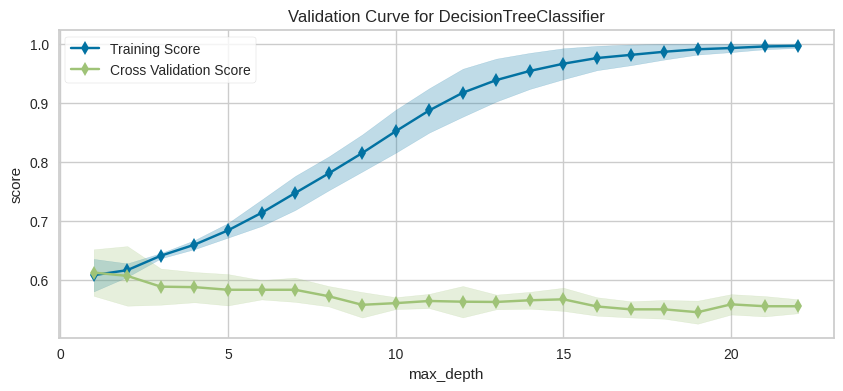

In [14]:
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.model_selection import validation_curve

tscv = TimeSeriesSplit(n_splits=5)

fig, ax = plt.subplots(figsize=(10,4))
viz = validation_curve(tree.DecisionTreeClassifier(),
                       X=pd.concat([X_trn, X_val]),
                       y=pd.concat([y_trn, y_val]),
                       param_name='max_depth', param_range=range(1,23),
                       scoring='accuracy', cv=tscv, ax=ax, n_jobs=6)